In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Data Preparation

In [57]:
df_google_search_data = pd.read_csv(
    "google_search_data.csv"
)



df_product_mnf_list = pd.read_csv(
    "product_manufacturer_list.csv"
)

df_product_mnf_list = df_product_mnf_list[
    [
        "PRODUCT_ID","Vendor"
    ]
]



df_sales_data = pd.read_csv(
    "sales_data.csv"
)



df_social_media_data = pd.read_csv(
    "social_media_data.csv"
)


df_social_media_data.rename(
    columns={
        "Theme Id":"CLAIM_ID"
    },
    inplace=True
)


df_Theme_list = pd.read_csv(
    "Theme_list.csv"
)



df_Theme_product_list = pd.read_csv(
    "Theme_product_list.csv"
)

df_Theme_product_list

,PRODUCT_ID,CLAIM_ID
0,26,8
1,29,8
2,48,81
3,50,81
4,74,227
...,...,...
91480,8158,0
91481,45183,0
91482,25690,0
91483,46085,0


#### a) Merge the required data sources

In [58]:
df_sales_data.rename(columns={"product_id":"PRODUCT_ID"}, inplace=True)
df_sales_data

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value
0,20160109,1,13927,934,18680
1,20160109,3,10289,1592,28646
2,20160109,4,357,22,440
3,20160109,6,23113,2027,81088
4,20160109,7,23177,3231,58164
...,...,...,...,...,...
1048570,20161203,48066,949,240,1200
1048571,20161203,48067,38793,2151,107550
1048572,20161203,48069,15641,4424,15483
1048573,20161203,48073,819,672,105


In [59]:
# Merge 'sales_theme_data' dataset with 'Theme_product_list' dataset
df_sales_theme_data = pd.merge(
    df_sales_data,
    df_Theme_product_list, 
    how="inner",
    on="PRODUCT_ID"
)

df_sales_theme_data

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
0,20160109,1,13927,934,18680,0
1,20160123,1,12628,878,17564,0
2,20160206,1,11379,810,16200,0
3,20160130,1,11568,821,16424,0
4,20160213,1,10959,784,15682,0
...,...,...,...,...,...,...
1726170,20161210,42485,19,8,7,40
1726171,20161210,42485,19,8,7,432
1726172,20161210,42486,19,8,7,432
1726173,20161210,42486,19,8,7,8


In [60]:
# Merge 'google_search_data' dataset with 'Theme_product_list' dataset
df_google_search_data.rename(
    columns={
        "Claim_ID":"CLAIM_ID"
    },
    inplace=True
)

df_google_search_data



df_google_search_theme_data = pd.merge(
    df_google_search_data,
    df_Theme_product_list, 
    how="inner",
    on="CLAIM_ID"
)

df_google_search_theme_data

,date,platform,searchVolume,CLAIM_ID,week_number,year_new,PRODUCT_ID
0,01-01-2014,google,6613,8,1,2014,26
1,01-01-2014,google,6613,8,1,2014,29
2,01-01-2014,google,6613,8,1,2014,86
3,01-01-2014,google,6613,8,1,2014,87
4,01-01-2014,google,6613,8,1,2014,120
...,...,...,...,...,...,...,...
100858375,29-06-2019,google,41,433,26,2019,18931
100858376,29-06-2019,google,41,433,26,2019,18932
100858377,29-06-2019,google,41,433,26,2019,26054
100858378,29-06-2019,google,41,433,26,2019,26059


In [61]:
# Merge 'product_manufacturer_list' dataset with 'Theme_product_list' dataset
df_product_mnf_theme_list = pd.merge(
    df_product_mnf_list,
    df_Theme_product_list,
    how="inner",
    on="PRODUCT_ID"
)

df_product_mnf_theme_list

,PRODUCT_ID,Vendor,CLAIM_ID
0,1,Others,0
1,2,Others,0
2,3,Others,0
3,4,Others,0
4,5,Others,0
...,...,...,...
91480,57314,Others,40
91481,57314,Others,8
91482,57315,Others,8
91483,57316,Others,8


### After merging above datasets, we will use 4 datasets for further processing i.e.

### a) df_google_search_theme_data
### b) df_product_mnf_theme_list
### c) df_sales_theme_data
### d) df_social_media_data

#### b) Provide the list of themes available across all data sources

In [62]:
# List of themes in 'df_google_search_theme_data' dataset
df_google_search_theme_data["CLAIM_ID"].unique()

array([  8,  39,  40, 100, 151, 191, 192, 163, 152, 207, 430,  81, 142,
       437, 438,  65, 211, 187, 158,  75, 227, 228, 148, 120, 193, 384,
       393, 101, 125, 433], dtype=int64)

In [63]:
# List of themes in 'df_product_mnf_theme_list' dataset
df_product_mnf_theme_list["CLAIM_ID"].unique()

array([  0,   8, 227, 158,  81,  40, 438, 430,  58, 432, 433, 224, 186,
        32, 187, 185, 222, 193, 220, 120, 125, 437, 145, 152, 151, 228,
        65,  39,  16, 287,  75,  73, 384, 142, 393,  15, 192, 147, 148,
       163, 207,  38, 101,  59, 178, 157, 191, 100, 211, 385, 171],
      dtype=int64)

In [64]:
# List of themes in 'df_sales_theme_data' dataset
df_sales_theme_data["CLAIM_ID"].unique()

array([  0, 158, 227, 432, 186, 222, 185, 430, 187, 224, 220, 193, 438,
        32,  40,  58,   8,  81, 151,  75, 163, 147, 120, 207, 152, 228,
        39,  73, 433,  15, 437, 192, 287, 385, 125,  16, 178, 384, 145,
       100, 142, 101, 171, 393, 191,  38], dtype=int64)

In [65]:
# List of themes in 'df_social_media_data' dataset
df_social_media_data["CLAIM_ID"] = df_social_media_data["CLAIM_ID"].astype("Int64")
df_social_media_data["CLAIM_ID"].unique()

<IntegerArray>
[ 148,  543,  847,  999,  816,  747,  922,  754,  915,  683,
 ...
  727,  171,  508,  769,  949,  521,  145,  147, <NA>,  876]
Length: 194, dtype: Int64

#### c) Understand consumer preference(themes) available in each data source

In [66]:
df_google_search_theme_data_groupby_theme = df_google_search_theme_data.groupby(
    [
        "CLAIM_ID","year_new"
    ]
).agg(
    {
        "searchVolume":"mean",
        "PRODUCT_ID":"count",
        "platform":set
    }
).rename(
    columns={
        "PRODUCT_ID":"Total Products",
        "searchVolume":"Average SearchVolume",
        "platform":"Platforms Used"
    }
)

df_google_search_theme_data_groupby_theme

Average SearchVolume  Total Products  \
CLAIM_ID year_new                                         
8        2014               5931.939227         6753110   
         2015               6566.228022         6790420   
         2016               6691.167582         6790420   
         2017               5288.865229         6921005   
         2018               2386.129346        26825890   
...                                 ...             ...   
438      2015              12362.728022          548912   
         2016              11815.659341          548912   
         2017              10371.053908          559468   
         2018               4461.372881         1512524   
         2019               4295.411429         1319500   

                                     Platforms Used  
CLAIM_ID year_new                                    
8        2014                              {google}  
         2015                              {google}  
         2016                              {google}  
         2017                              {google}  
         2018      {chewy, amazon, google, walmart}  
...                                             ...  
438      2015                              {google}  
         2016                              {google}  
         2017                              {google}  
         2018      {chewy, amazon, google, walmart}  
         2019      {chewy, amazon, google, walmart}  

[157 rows x 3 columns]

In [67]:
df_product_mnf_theme_groupby_list = df_product_mnf_theme_list.groupby(
    "CLAIM_ID"
).agg(
    {
        "PRODUCT_ID":"count",
        "Vendor":set
    }
).rename(
    {
        "PRODUCT_ID":"Total Products",
        "Vendor":"Vendor_Set"
    }
)

df_product_mnf_theme_groupby_list

,PRODUCT_ID,Vendor
CLAIM_ID,,
0,29152,"{A, Private Label, G, D, H, B, Others, E, F}"
8,18655,"{A, Private Label, H, D, B, Others, F}"
15,320,"{D, Private Label, A, Others}"
16,295,{Others}
32,3426,"{A, H, D, B, Others, F}"
38,22,"{A, Others}"
39,335,"{B, A, Others}"
40,7537,"{A, Private Label, H, D, B, Others, F}"
58,2397,"{A, Private Label, H, D, B, Others, F}"


In [68]:
df_sales_theme_groupby_data = df_sales_theme_data.groupby(
    "CLAIM_ID"
).agg(
    {
        "PRODUCT_ID":"count",
        "sales_dollars_value":"mean",
        "sales_units_value":"mean",
        "sales_lbs_value":"mean"
    }).rename(
    columns={
        "PRODUCT_ID":"Total Products",
        "sales_dollars_value":"Average_Sales_Dollar_Value",
        "sales_units_value":"Average_Sales_Units_Value",
        "sales_lbs_value":"Average_Sales_LBS_Value"
    }
)

df_sales_theme_groupby_data

,Total Products,Average_Sales_Dollar_Value,Average_Sales_Units_Value,Average_Sales_LBS_Value
CLAIM_ID,,,,
0,522809,28150.967087,9387.449973,28994.824425
8,325602,12102.630546,1670.865357,4231.995362
15,5430,6831.744199,399.124125,1465.758011
16,4067,1064.594541,445.245881,166.279567
32,79860,37251.381818,3813.042938,16212.472402
38,3,1497.000000,90.666667,68.333333
39,4212,8885.757835,529.973409,4161.860636
40,185482,18758.106652,1899.099799,7696.288060
58,42665,7865.673433,1645.527669,2117.672917


In [69]:
def change_date_format(x):
    if "/" in x:
        return x.replace("/","-")
    else:
        return x
        
s = "10/03/2014"
change_date_format(s)

df_social_media_data["published_date"] = df_social_media_data["published_date"].apply(change_date_format)
df_social_media_data

,CLAIM_ID,published_date,total_post
0,148,10-01-2015,76
1,148,10-10-2015,31
2,148,10-11-2015,65
3,148,10-12-2015,88
4,148,10-13-2015,85
...,...,...,...
533385,876,09-05-2019,4658
533386,876,09-06-2019,3731
533387,876,09-07-2019,2336
533388,876,09-08-2019,1374


In [70]:
df_social_media_data["published_date"] = pd.to_datetime(
    df_social_media_data[
        "published_date"
    ]
)

df_social_media_data["Published_Year"] = pd.DatetimeIndex(
    df_social_media_data[
        "published_date"
    ]
).year


df_theme_social_media_groupby_data = df_social_media_data.groupby(
    [
        "CLAIM_ID",
        "Published_Year"
    ]
)[
    "total_post"
].mean()

df_theme_social_media_groupby_data

CLAIM_ID  Published_Year
8         2015              219.177778
          2016              249.297814
          2017              329.901370
          2018              460.295890
          2019              351.720395
                               ...    
999       2015               18.768889
          2016               23.931694
          2017               34.857988
          2018               57.331507
          2019               45.634868
Name: total_post, Length: 965, dtype: float64

#### d) Provide a report for data sufficiency, sparsity and anomalies in each data source

###### Check for Sparsity

In [71]:
# Check the number of records in 'df_google_search_theme_data' with 'searchVolume' = 0 
df_google_search_theme_data.loc[df_google_search_theme_data["searchVolume"] == 0].size

0

In [113]:
print(str(round(
    (
        df_product_mnf_theme_list.loc[
            df_product_mnf_theme_list[
                "CLAIM_ID"
            ] == 0].shape[0]
        /
        df_product_mnf_theme_list.shape[0]
    )*100,
    2
)) + "%")

31.87%


In [73]:
df_sales_theme_data

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
0,20160109,1,13927,934,18680,0
1,20160123,1,12628,878,17564,0
2,20160206,1,11379,810,16200,0
3,20160130,1,11568,821,16424,0
4,20160213,1,10959,784,15682,0
...,...,...,...,...,...,...
1726170,20161210,42485,19,8,7,40
1726171,20161210,42485,19,8,7,432
1726172,20161210,42486,19,8,7,432
1726173,20161210,42486,19,8,7,8


In [107]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'sales_dollars_value' as 0 
print(
    str(round(
        (
            df_sales_theme_data.loc[
                df_sales_theme_data[
                    "sales_dollars_value"
                ] 
                == 0
            ].shape[0]
            /
            df_sales_theme_data.shape[0]
        )*100,
        2
    ))
+ "%")

0.23%


In [109]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'sales_units_value' as 0
print(str(round(
    (
        df_sales_theme_data.loc[
            df_sales_theme_data[
                "sales_units_value"
            ] 
            == 0
        ].shape[0]
        /
        df_sales_theme_data.shape[0]
    )*100,
    2
)) + "%")

0.0%


In [110]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'sales_lbs_value' as 0
print(str(round(
    (
        df_sales_theme_data.loc[
            df_sales_theme_data[
                "sales_lbs_value"
            ] 
            == 0
        ].shape[0]
        /
        df_sales_theme_data.shape[0]
    )*100,
    2
)) + "%")

0.81%


In [111]:
# Check the percentage of records in 'df_sales_theme_data' dataset with 'CLAIM_ID' as 0
print(str(round(
    (
        df_sales_theme_data.loc[
            df_sales_theme_data[
                "CLAIM_ID"
            ] 
            == 0
        ].shape[0]
        /
        df_sales_theme_data.shape[0]
    )*100,
    2
)) + "%")

30.29%


In [112]:
# Check the percentage of records in 'df_social_media_data' dataset with 'total_post' as 0
print(str(round(
    (
        df_social_media_data.loc[
            df_social_media_data[
                "total_post"
            ] 
            == 
            0].shape[0]
        /
        df_social_media_data.shape[0]
    )*100,
    2
)) + "%")

16.38%


###### Check for outliers in the datasets

In [79]:
# Get 25th percentile for 'searchVolume' column in 'df_google_search_theme_data' dataset
Q1 = df_google_search_theme_data[
    "searchVolume"
].quantile(0.25)

# Get 75th percentile for 'searchVolume' column in 'df_google_search_theme_data' dataset
Q3 = df_google_search_theme_data[
    "searchVolume"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'searchVolume' column in 'df_google_search_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'searchVolume' column in 'df_google_search_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'searchVolume' column in 'df_google_search_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_google_search_theme_data' dataset with outliers in 'searchVolume' column
df_google_search_theme_data_outliers = df_google_search_theme_data.loc[
    (
        df_google_search_theme_data[
            "searchVolume"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_google_search_theme_data[
            "searchVolume"
        ]
        >
        upper_limit
    )
]

In [108]:
# Check the percentage of outliers in 'searchVolume' column of 'df_google_search_theme_data' dataset
print(str(round(
    (
        df_google_search_theme_data_outliers.shape[0]
        /
        df_google_search_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

1.54%


<AxesSubplot:>

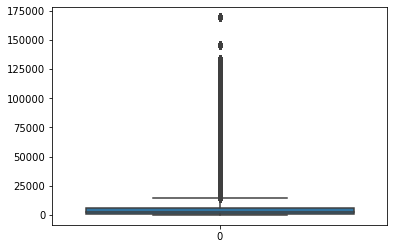

In [81]:
# Boxplot of 'searchVolume' column of 'df_google_search_theme_data' dataset
sns.boxplot(
    data = 
    df_google_search_theme_data[
    "searchVolume"
    ],
    orient = "v"
)

In [82]:
df_sales_theme_data

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
0,20160109,1,13927,934,18680,0
1,20160123,1,12628,878,17564,0
2,20160206,1,11379,810,16200,0
3,20160130,1,11568,821,16424,0
4,20160213,1,10959,784,15682,0
...,...,...,...,...,...,...
1726170,20161210,42485,19,8,7,40
1726171,20161210,42485,19,8,7,432
1726172,20161210,42486,19,8,7,432
1726173,20161210,42486,19,8,7,8


In [91]:
# Get 25th percentile for 'sales_dollars_value' column in 'df_sales_theme_data' dataset
Q1 = df_sales_theme_data[
    "sales_dollars_value"
].quantile(0.25)

# Get 75th percentile for 'sales_dollars_value' column in 'df_sales_theme_data' dataset
Q3 = df_sales_theme_data[
    "sales_dollars_value"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'sales_dollars_value' column in 'df_sales_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'sales_dollars_value' column in 'df_sales_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'sales_dollars_value' column in 'df_sales_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_sales_theme_data' dataset with outliers in 'sales_dollars_value' column
df_sales_dollars_theme_data_outliers = df_sales_theme_data.loc[
    (
        df_sales_theme_data[
            "sales_dollars_value"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_sales_theme_data[
            "sales_dollars_value"
        ]
        >
        upper_limit
    )
]


df_sales_dollars_theme_data_outliers

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
145,20160123,6,35417,3142,125688,0
155,20160402,6,32884,2989,119550,0
158,20160423,6,36090,3075,123007,0
162,20160521,6,32983,2872,114875,0
166,20160618,6,37660,2822,112877,0
...,...,...,...,...,...,...
1725190,20161126,14016,68418,17110,59885,227
1725191,20161203,14016,94072,23316,81608,227
1725192,20161210,14016,109733,27628,96701,227
1725847,20161203,11734,64851,4883,13123,58


In [114]:
# Check the percentage of outliers in 'sales_dollars_value' column of 'df_sales_theme_data' dataset
print(str(round(
    (
        df_sales_dollars_theme_data_outliers.shape[0]
        /
        df_sales_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

13.05%


<AxesSubplot:>

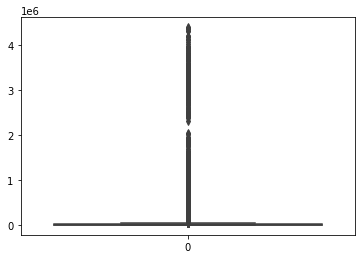

In [88]:
# Boxplot of 'sales_dollars_value' column of 'df_sales_theme_data' dataset
sns.boxplot(
    data = df_sales_theme_data[
        "sales_dollars_value"
    ],
    orient="v"
)

In [93]:
# Get 25th percentile for 'sales_units_value' column in 'df_sales_theme_data' dataset
Q1 = df_sales_theme_data[
    "sales_units_value"
].quantile(0.25)

# Get 75th percentile for 'sales_units_value' column in 'df_sales_theme_data' dataset
Q3 = df_sales_theme_data[
    "sales_units_value"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'sales_units_value' column in 'df_sales_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'sales_units_value' column in 'df_sales_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'sales_units_value' column in 'df_sales_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_sales_theme_data' dataset with outliers in 'sales_units_value' column
df_sales_units_theme_data_outliers = df_sales_theme_data.loc[
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        >
        upper_limit
    )
]

df_sales_units_theme_data_outliers

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
200,20160312,7,30600,3787,68161,0
201,20160319,7,31226,4113,74036,0
202,20160326,7,29698,3883,69891,0
203,20160402,7,33225,4147,74649,0
205,20160416,7,25610,3731,67162,0
...,...,...,...,...,...,...
1725674,20161126,51286,2847,7889,2712,0
1725679,20161119,51981,1580,4380,1506,0
1725680,20161126,51981,2767,7658,2632,0
1725847,20161203,11734,64851,4883,13123,58


In [115]:
# Check the percentage of outliers in 'sales_units_value' column of 'df_sales_theme_data' dataset
print(str(round(
    (
        df_sales_units_theme_data_outliers.shape[0]
        /
        df_sales_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

14.15%


<AxesSubplot:>

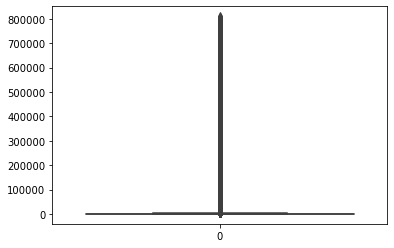

In [95]:
# Boxplot of 'sales_units_value' column of 'df_sales_theme_data' dataset
sns.boxplot(
    data = df_sales_theme_data[
        "sales_units_value"
    ],
    orient="v"
)

In [96]:
# Get 25th percentile for 'sales_lbs_value' column in 'df_sales_theme_data' dataset
Q1 = df_sales_theme_data[
    "sales_lbs_value"
].quantile(0.25)

# Get 75th percentile for 'sales_lbs_value' column in 'df_sales_theme_data' dataset
Q3 = df_sales_theme_data[
    "sales_lbs_value"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'sales_lbs_value' column in 'df_sales_theme_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'sales_lbs_value' column in 'df_sales_theme_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'sales_lbs_value' column in 'df_sales_theme_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_sales_theme_data' dataset with outliers in 'sales_lbs_value' column
df_sales_lbs_theme_data_outliers = df_sales_theme_data.loc[
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_sales_theme_data[
            "sales_units_value"
        ]
        >
        upper_limit
    )
]

df_sales_lbs_theme_data_outliers

,system_calendar_key_N,PRODUCT_ID,sales_dollars_value,sales_units_value,sales_lbs_value,CLAIM_ID
288,20160109,9,304750,19619,784769,0
289,20160123,9,305526,19246,769852,0
290,20160206,9,270137,17801,712023,0
291,20160130,9,299819,19240,769609,0
292,20160213,9,291778,22763,910506,0
...,...,...,...,...,...,...
1724721,20161210,2913,804224,57126,1382443,0
1725189,20161119,14016,45117,11212,39243,227
1725190,20161126,14016,68418,17110,59885,227
1725191,20161203,14016,94072,23316,81608,227


In [116]:
# Check the percentage of outliers in 'sales_lbs_value' column of 'df_sales_theme_data' dataset
print(str(round(
    (
        df_sales_lbs_theme_data_outliers.shape[0]
        /
        df_sales_theme_data.shape[0]
    )
    *
    100,
    2
)) + "%")

6.32%


<AxesSubplot:>

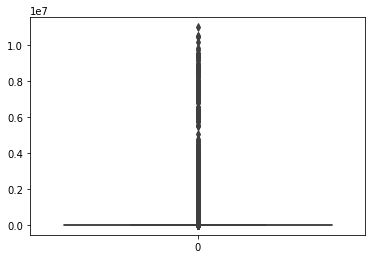

In [98]:
# Boxplot of 'sales_lbs_value' column of 'df_sales_theme_data' dataset
sns.boxplot(
    data = df_sales_theme_data[
        "sales_lbs_value"
    ],
    orient="v"
)

In [102]:
# Get 25th percentile for 'total_post' column in 'df_social_media_data' dataset
Q1 = df_social_media_data[
    "total_post"
].quantile(0.25)

# Get 75th percentile for 'total_post' column in 'df_social_media_data' dataset
Q3 = df_social_media_data[
    "total_post"
].quantile(0.75)

# Get inter-quartile range (IQR) of 'total_post' column in 'df_social_media_data' dataset
IQR = Q3-Q1

# Get lower limit of the Decision Range of 'total_post' column in 'df_social_media_data' dataset
lower_limit = Q1 - 1.5*IQR

# Get upper limit of the Decision Range of 'total_post' column in 'df_social_media_data' dataset
upper_limit = Q3 + 1.5*IQR

# Get the dataset from 'df_social_media_data' dataset with outliers in 'total_post' column
df_social_media_data_outliers = df_social_media_data.loc[
    (
        df_social_media_data[
            "total_post"
        ]
        <
        lower_limit
    ) 
    | 
    (
        df_social_media_data[
            "total_post"
        ]
        >
        upper_limit
    )
]

df_social_media_data_outliers

,CLAIM_ID,published_date,total_post,Published_Year
1612,543,2015-10-22,1082,2015
1857,543,2016-10-12,1300,2016
1866,543,2016-10-20,859,2016
1872,543,2016-10-26,1151,2016
1873,543,2016-10-27,884,2016
...,...,...,...,...
533385,876,2019-09-05,4658,2019
533386,876,2019-09-06,3731,2019
533387,876,2019-09-07,2336,2019
533388,876,2019-09-08,1374,2019


In [118]:
# Check the percentage of outliers in 'total_post' column of 'df_social_media_data' dataset
print(str(round(
    (
        df_social_media_data_outliers.shape[0]
        /
        df_social_media_data.shape[0]
    )
    *
    100,
    2
)) + "%")

17.42%


<AxesSubplot:>

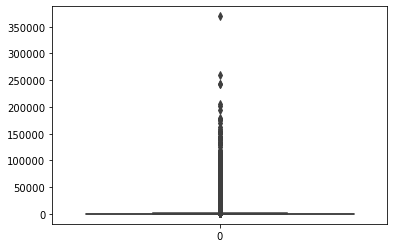

In [104]:
# Boxplot of 'total_post' column of 'df_social_media_data' dataset
sns.boxplot(
    data = df_social_media_data[
        "total_post"
    ],
    orient="v"
)